# Assignment 1 **<font color="blue"> (15 points )<font>**

------
### Notes and Instructions
  + You may need additional libraries besides the Python standard library to solve some questions. Import only necessary libraries.
  + If more than one library exist for a same purpose, choose the one you wish as long as it does the task properly.
  + If we want you to use a specific library, then we will state it clearly.
  + Use the exact variable names asked in the questions. When no clear instructions given, feel free to do it the way you would like to.
  + After each question, add the needed number of new cells and place your answers inside the cells.
  + Use text cells for explanations. Use explanation and plain text as much as possible.
  + Do not remove or modify the original cells provided by the instructor.
  + In the following cell you will find some extra options to make your code more readable, including output colors RED, OKBLUE, or output text styles like BOLD or UNDERLINE that. Do not hesitate to use them. As an example, one may output text in red as follows:
  ```python
     print(bcolors.RED + "your text" + bcolors.ENDC)
  ```
  + Comment your code whenever needed using # sign at the beginning of the row.
  + In some questions some of the details needed for solving the problem are **purposely** omitted to encourage additional self-directed research. This, especially, helps you develop some search skills for coding in Python (which is inevitable due to the inconsistent syntax of Python).
  + Do not hesitate to communicate your questions to the TA's or instructors. Good luck!  
  

In [ ]:
# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

## Question 1 <font color="blue">(1 point)</font>

  1. **<font color="blue">(0.5 points)</font>** Write a Python **function** that takes two **positive integers** and returns their **greatest common divisor**. In case you pass a negative integer to the function it must return the following string **in red**: <br> <font color="red"> "This function takes only positive integers!" </font>
  2. **<font color="blue">(0.5 points)</font>** Write a function that prints all the prime numbers less than or equal to $n$, where $n$ is a parameter to be passed to the function. If $n \leq 1$ the function returns <br>
<font color="red">"No prime number was found!"</span>.

### Question 1 - Part 1: Greatest Common Divisor
Explanation of the approach:
- Using Euclidean algorithm for GCD calculation
- Implementing error checking for negative integers
- Using provided color formatting for error messages

In [ ]:
def gcd(a, b):
    if a <= 0 or b <= 0:
        return bcolors.RED + "This function takes only positive integers!" + bcolors.ENDC

    while b:
        a, b = b, a % b
    return a

def print_primes(n):
    if n <= 1:
        return bcolors.RED+"No prime number was found!"+bcolors.ENDC

    # Using Sieve of Eratosthenes for efficiency
    is_prime = [True] * (n + 1)
    is_prime[0] = is_prime[1] = False

    for i in range(2, int(n ** 0.5) + 1):
        if is_prime[i]:
            for j in range(i * i, n + 1, i):
                is_prime[j] = False

    primes = [num for num in range(2, n + 1) if is_prime[num]]
    print(f"Prime numbers less than or equal to {n}:", primes)

# Test cases
print("Testing GCD function:")
print(gcd(12, 18))  # Should return 6
print(gcd(-4, 8))   # Should return error message
print(gcd(0, 5))    # Should return error message

print("\nTesting print_primes function:")
print(print_primes(1))   # Should return error message
print_primes(20)    # Should print [2, 3, 5, 7, 11, 13, 17, 19]

Testing GCD function:
6
This function takes only positive integers!
This function takes only positive integers!

Testing print_primes function:
No prime number was found!
Prime numbers less than or equal to 20: [2, 3, 5, 7, 11, 13, 17, 19]


## Question 2 <font color="blue">(6 points)</font>
Let $\mathbf X\sim \mbox{Exp}(\lambda)$, with parameter $\lambda = 1.2$.
  1. **<font color="blue">(0.5 points)</font>** What is the population mean?
  2. **<font color="blue">(1 point)</font>**  Generate $100$ different samples of $\mathbf X$, namely, $S_{100}, S_{200}, S_{300}, \dots, S_{10000}$, where indeces denote the number of observations (sample size) in each sample.
  3. **<font color="blue">(1.5 points)</font> Estimate** the population mean using each sample and explain the rationale behind your estimation.
  4. **<font color="blue">(1 point)</font>** Applying **appropriate** methods visualize and describe the values obtained in the previous step.
  5. **<font color="blue">(2 points)</font>** Finally, draw an inference about the population mean and its relation with sample means, based on visualized results in step 4.

Population mean: 0.8333


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Sample Size')

Text(0, 0.5, 'Mean')

Text(0.5, 1.0, 'Sample Means vs Population Mean')

<Figure size 1000x600 with 0 Axes>

<Axes: ylabel='Count'>

Text(0.5, 0, 'Sample Mean')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of Sample Means')

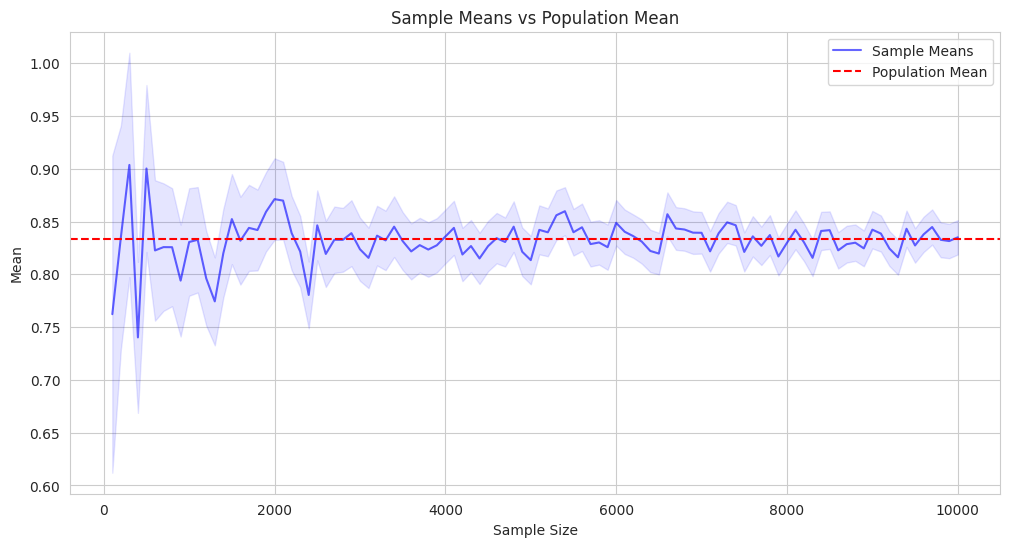

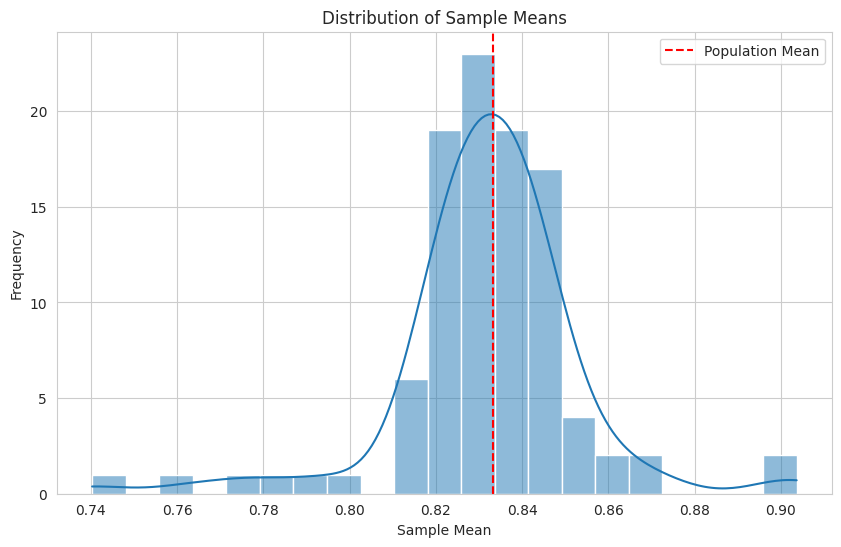


Summary Statistics:
Mean of sample means: 0.8321
Standard deviation of sample means: 0.0212
Minimum sample mean: 0.7403
Maximum sample mean: 0.9037


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Parameter lambda
lambda_param = 1.2

# 1. Population mean
population_mean = 1/lambda_param
print(f"Population mean: {population_mean:.4f}")

# 2. Generate samples
sample_sizes = np.arange(100, 10100, 100)
samples = [np.random.exponential(scale=1/lambda_param, size=size) for size in sample_sizes]

# 3. Estimate means
sample_means = [np.mean(sample) for sample in samples]

# 4. Visualize results
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Plot sample means
plt.plot(sample_sizes, sample_means, 'b-', label='Sample Means', alpha=0.6)
plt.axhline(y=population_mean, color='r', linestyle='--', label='Population Mean')

plt.xlabel('Sample Size')
plt.ylabel('Mean')
plt.title('Sample Means vs Population Mean')
plt.legend()

# Add confidence intervals
std_errors = [np.std(sample, ddof=1)/np.sqrt(size) for sample, size in zip(samples, sample_sizes)]
ci_upper = [mean + 1.96*se for mean, se in zip(sample_means, std_errors)]
ci_lower = [mean - 1.96*se for mean, se in zip(sample_means, std_errors)]

plt.fill_between(sample_sizes, ci_lower, ci_upper, color='b', alpha=0.1, label='95% CI')

# Additional visualization: Distribution of means
plt.figure(figsize=(10, 6))
sns.histplot(sample_means, kde=True)
plt.axvline(x=population_mean, color='r', linestyle='--', label='Population Mean')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Means')
plt.legend()

plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print(f"Mean of sample means: {np.mean(sample_means):.4f}")
print(f"Standard deviation of sample means: {np.std(sample_means):.4f}")
print(f"Minimum sample mean: {min(sample_means):.4f}")
print(f"Maximum sample mean: {max(sample_means):.4f}")

## Question 3 <font color="blue">(8 points)</font>
In this exercise you will create some simulated data and will fit simple
linear regression models to it. Make sure to fix the seed to $111$ prior to
starting.
  
  1. **<font color="blue">(0.25 points)</font>** Create a vector `x` containing $100$ observations drawn from a $\mathcal{N}(0, 1)$ distribution as your feature.
  2. **<font color="blue">(0.25 points)</font>** Create a vector, `eps` (for $\epsilon$), containing $100$ observations drawn from a $\mathcal{N}(0, 0.25)$.
  3. **<font color="blue">(0.5 points)</font>** Using `x` and `eps` generate a vector `y` according to the model $y = −1 + 0.5x + \epsilon$.
  4. **<font color="blue">(0.5 points)</font>** Create a scatterplot displaying the relationship between `x` and `y`. Comment on what you observe.
  5. **<font color="blue">(2 points)</font>** Fit a least squares linear model to predict `y` using `x` . Comment on the model obtained. How do $\hat{\beta}_0$ and $\hat{\beta}_1$ compare to $\beta_0$ and $\beta_1$?
  6. **<font color="blue">(2 point)</font>** Display the least squares line on the scatterplot obtained in part 4. Draw the population regression line on the plot, in a different color. Create an appropriate legend.
  7. **<font color="blue">(2.5 points)</font>** Explain how the result would change if you generate the data with less noise and repeat all steps 1 to 6? What about more noise?


Results for noise_std = 0.25:
True β₀ = -1, Estimated β₀ = -0.9916
True β₁ = 0.5, Estimated β₁ = 0.4804
R² score: 0.7866


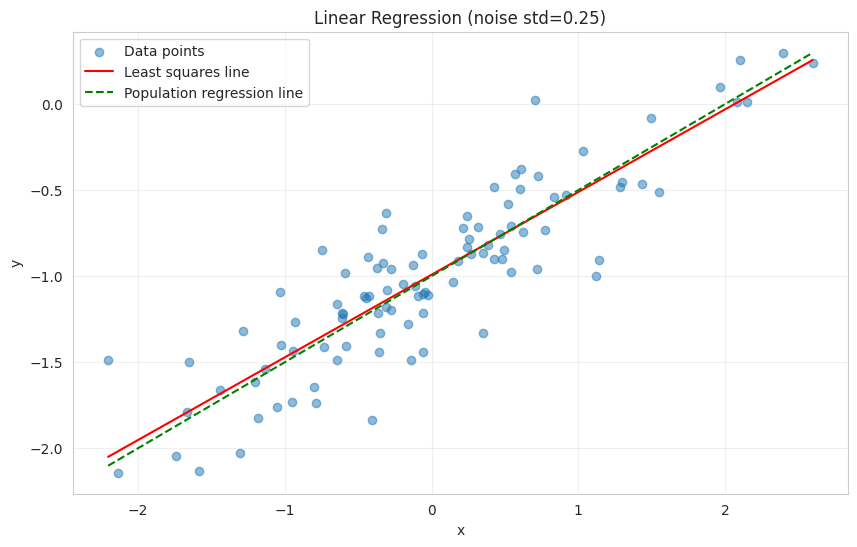


Results for noise_std = 0.1:
True β₀ = -1, Estimated β₀ = -0.9966
True β₁ = 0.5, Estimated β₁ = 0.4921
R² score: 0.9603


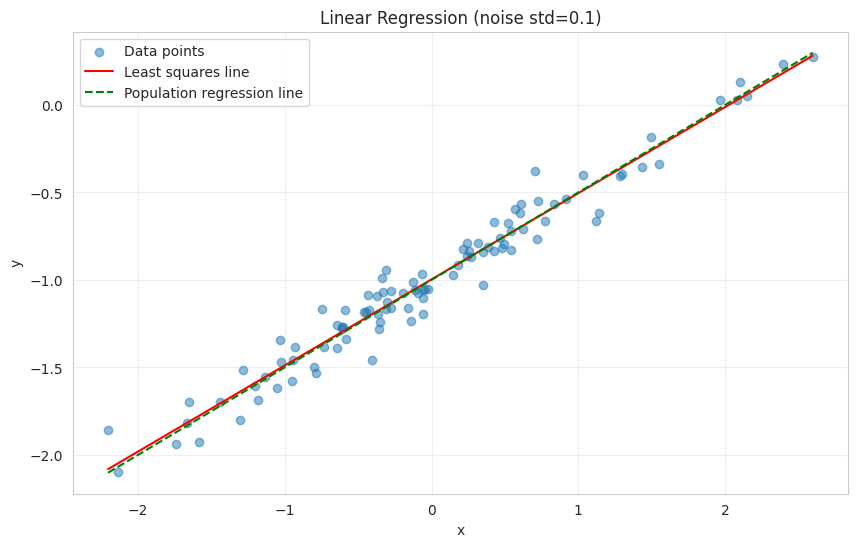


Results for noise_std = 0.5:
True β₀ = -1, Estimated β₀ = -0.9831
True β₁ = 0.5, Estimated β₁ = 0.4607
R² score: 0.4588


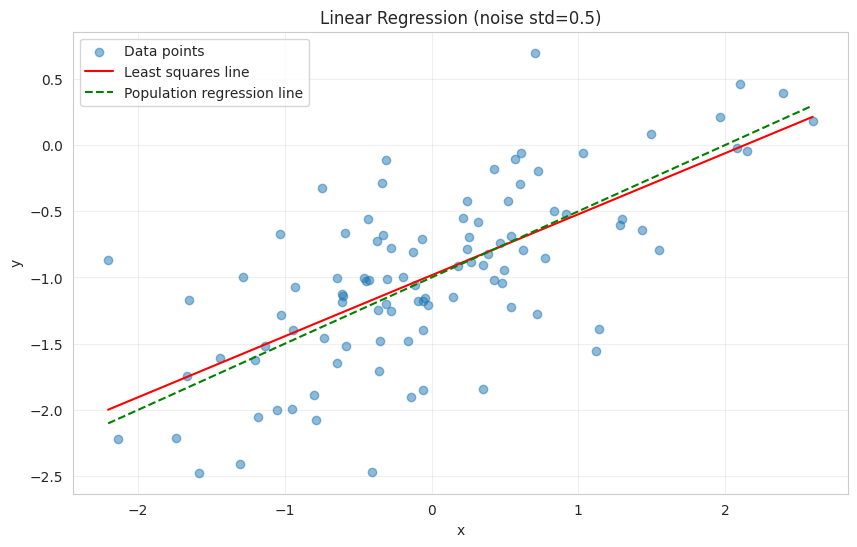

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

def simulate_and_analyze(seed=111, noise_std=0.25):
    # Set seed
    np.random.seed(seed)

    # 1. Generate x
    x = np.random.normal(0, 1, 100)

    # 2. Generate epsilon (noise)
    eps = np.random.normal(0, noise_std, 100)

    # 3. Generate y
    y = -1 + 0.5 * x + eps

    # 4. Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.5, label='Data points')

    # 5. Fit least squares model
    X = x.reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, y)

    # Get coefficients
    beta0_hat = model.intercept_
    beta1_hat = model.coef_[0]

    # 6. Plot regression lines
    x_range = np.linspace(min(x), max(x), 100)

    # Plot least squares line
    plt.plot(x_range, model.predict(x_range.reshape(-1, 1)),
             'r-', label='Least squares line')

    # Plot population regression line
    plt.plot(x_range, -1 + 0.5 * x_range,
             'g--', label='Population regression line')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Linear Regression (noise std={noise_std})')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Print model results
    print(f"\nResults for noise_std = {noise_std}:")
    print(f"True β₀ = -1, Estimated β₀ = {beta0_hat:.4f}")
    print(f"True β₁ = 0.5, Estimated β₁ = {beta1_hat:.4f}")
    print(f"R² score: {model.score(X, y):.4f}")

    return plt

# Original noise level
plt1 = simulate_and_analyze(noise_std=0.25)
plt1.show()

# Less noise
plt2 = simulate_and_analyze(noise_std=0.1)
plt2.show()

# More noise
plt3 = simulate_and_analyze(noise_std=0.5)
plt3.show()